In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer, normalize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import re
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
train=pd.read_csv('santander_train.csv',index_col='ID')
test=pd.read_csv('santander_test.csv',index_col='ID')

In [3]:
train['target'].head()

ID
000d6aaf2    38000000.0
000fbd867      600000.0
0027d6b71    10000000.0
0028cbf45     2000000.0
002a68644    14400000.0
Name: target, dtype: float64

In [4]:
df=pd.concat([train,test])
df.head()

,001476ffa,0019109c4,0022de2b3,0024cd760,002d634dc,00302fe51,003da5628,006e72749,007d71f12,007ee91d1,...,ffa6b80e2,ffa903344,ffb34b926,ffca57b7b,ffcec956f,ffd2f9409,ffd50f0bf,ffdc4bcf8,ffec49dae,target
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38000000.0
000fbd867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600000.0
0027d6b71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0
0028cbf45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0
002a68644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14400000.0


In [69]:
#Menghapus kolom dengan 0% missing value
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0].index
df.drop(missing_features, axis=1, inplace=True)

In [6]:
#Memisahkan kolom categoric dan numeric
df_categoric = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(exclude=['object'])

In [7]:
df_categoric.head() #tidak ada yang categoric

""
ID
000d6aaf2
000fbd867
0027d6b71
0028cbf45
002a68644


In [16]:
# # Transformasi
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # StandardScaler
# scaler1=StandardScaler()
# df1=scaler1.fit(df).transform(df)
# df1=pd.DataFrame(df1)

In [5]:
train1=df[:4459]
test1=df[4459:]

## Training

In [27]:
x=train1.drop('target',axis=1)
y=train['target']
train_x , val_x, train_y, val_y = train_test_split(x,y, test_size=0.2,random_state=123)

In [28]:
#feature selection
clf_gb = GradientBoostingRegressor(random_state = 42)
clf_gb.fit(train_x, train_y)
print(clf_gb)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)


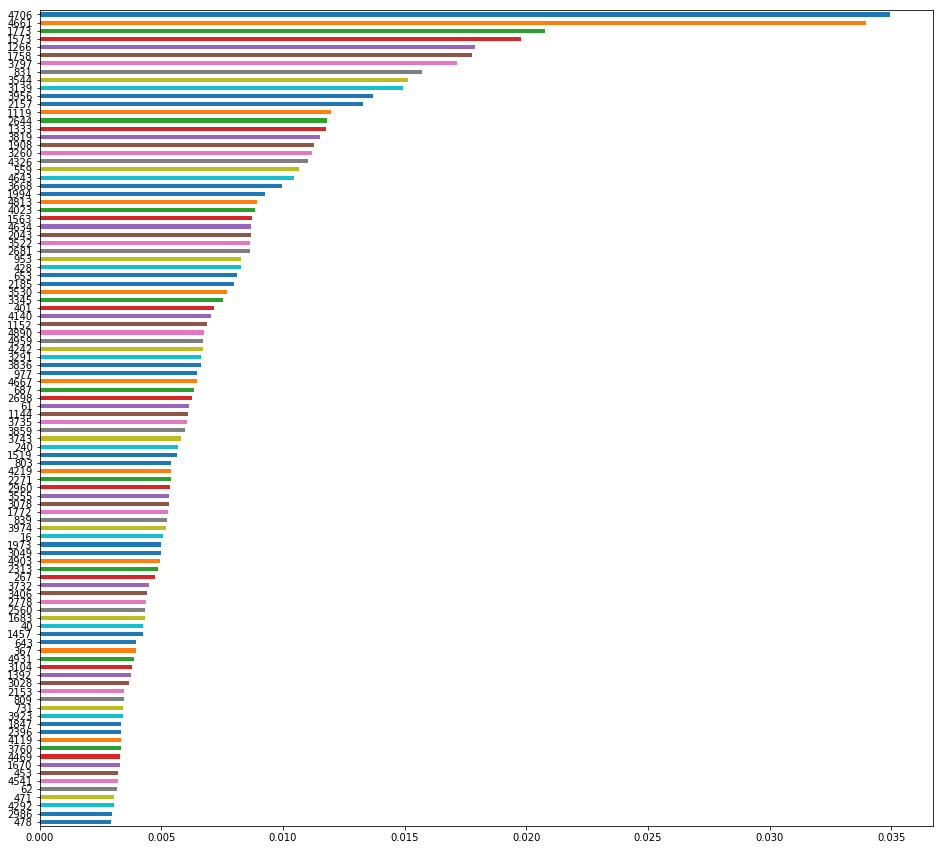

In [72]:
# GradientBoostingRegressor feature importance - top 100
feat_importances = pd.Series(clf_gb.feature_importances_, index=train_x.columns)
feat_importances = feat_importances.nlargest(100)
plt.figure(figsize=(16,15))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [29]:
a=list(pd.Series(clf_gb.feature_importances_, index=train_x.columns).nlargest(1000).index)
a

['f190486d6',
 'eeb9cd3aa',
 '58e2e02e6',
 '4edc3388d',
 '3e37bffde',
 '58232a6fb',
 'c1ad8b95a',
 '2862eec4f',
 'b4da814b8',
 '9fd594eec',
 'ca25aad9f',
 '6d0d72180',
 '36a131c2c',
 '879e1f51a',
 '42b407f0d',
 'c2dae3a5a',
 '5fb9cabb1',
 'a60974604',
 'dd80d36d7',
 '1c71183bb',
 'edc84139a',
 'bb1113dbb',
 '645b47cde',
 'f74e8f13d',
 'cd7f0affd',
 '4e5da0e96',
 'ed6c300c2',
 '66ace2992',
 'b379107b3',
 '899dbe405',
 '2d6bd8275',
 '16b532cdc',
 '20aa07010',
 '6eef030c1',
 'b43a7cfd5',
 'aa164b93b',
 '15ace8c9f',
 'd428161d9',
 '37f57824c',
 'fb0f5dbfe',
 'fe919be32',
 'd9dc805dd',
 'a76ad8513',
 'c3c633f64',
 '2e7f340f2',
 'ef2056ce5',
 '2223c664d',
 '8ab6f5695',
 '0397f7c9b',
 '37ac53919',
 'befca8b7e',
 'c5a231d81',
 'bf35dbb69',
 '0c9462c08',
 '4c427c13e',
 '26df61cc3',
 'd8c61553b',
 '73687e512',
 '96e03563a',
 'b599b0064',
 '9d478c2ae',
 '58e056e12',
 '28bc37378',
 'cb22f8a26',
 '00f844fea',
 '633e0d42e',
 '9bb02469c',
 'fb6da0420',
 '75de1e5b6',
 '0dfd57950',
 'bee629024',
 'adb6

In [30]:
train2=train1[a]
test2=test1[a]

In [60]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=30, random_state=123)
# pca.fit(train2)
# pca_temp_train = pca.fit_transform(train2)

# train3=pd.DataFrame(pca_temp_train)

# Transformasi
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # StandardScaler
# scaler1=StandardScaler()
# df_num1=scaler1.fit(df_num).transform(df_num)
# # Min Max
# scaler2 = MinMaxScaler(feature_range=(-1, 1))
# data_scaler2 = scaler2.fit(df_num).transform(df_num)
# df_num2=pd.DataFrame(data_scaler2)
# # Akar pangkat 3
# df_num3=np.cbrt(df_num)

In [31]:
x=np.cbrt(train2)
y=np.log1p(train['target'])
train_x , val_x, train_y, val_y = train_test_split(x,y, test_size=0.2,random_state=123)

In [32]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [33]:
gb = GradientBoostingRegressor(random_state=123)
gb.fit(train_x,train_y)
gbpred = gb.predict(val_x)
print(rmsle(val_y, gbpred))

1.471774592793183


In [34]:
rf = RandomForestRegressor(random_state=123, min_samples_split=100, min_samples_leaf=10)
rf.fit(train_x,train_y)
rfpred = rf.predict(val_x)

# gb = GradientBoostingRegressor(random_state=123)
# gb.fit(train_x,train_y)
# gbpred = gb.predict(val_x)

In [35]:
print(rmsle(val_y, rfpred))

1.4644581354563357


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x,train_y)
lrpred = lr.predict(val_x)
print(rmsle(val_y, lrpred))

1813678540976.024


In [37]:
from sklearn import ensemble

In [38]:
et=ensemble.ExtraTreesRegressor()
et.fit(train_x,train_y)
etpred = et.predict(val_x)
print(rmsle(val_y, etpred))

1.5064069689749267


In [39]:
from sklearn import ensemble

In [40]:
import lightgbm as lgb

In [41]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [42]:
model_lgb.fit(train_x, train_y)
lgb_train_pred = model_lgb.predict(train_x)
lgb_pred = np.expm1(model_lgb.predict(np.cbrt(test2)))
print(rmsle(train_y, lgb_train_pred))

1.20431636523001


In [25]:
test2=test2.drop('target',axis=1)

## Prediksi

In [43]:
classpredict=np.expm1(model_lgb.predict(np.cbrt(test2)))
classpredict1=pd.DataFrame(classpredict,columns=['target'])
classpredict1.head()

,target
0,3.062627e+06
1,1.936165e+06
2,2.596892e+06
3,4.921054e+06
4,1.936165e+06


In [44]:
myprediction=pd.concat([test.reset_index()['ID'],classpredict1],axis=1)

In [45]:
myprediction.to_csv('submission2.csv',index=False,header=True)